[View in Colaboratory](https://colab.research.google.com/github/cp612sh/CodeLab/blob/master/Lucid_Tutorial.ipynb)

##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucid: 快速指南

本指南将快速地介绍[**Lucid**](https://github.com/tensorflow/lucid)，一种用来可视化神经网络的网络。Lucid可以视为DeepDream的精神继任者，不过其提供了弹性的抽象能够被用作更广泛的解析研究。

**注意**：使用本指南最简单的方式就是将其[作为一个colab notebook](https://colab.sandbox.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb)打开，其允许你不需要进行任何设置就可以深入其中。我们推荐将免费的GPU加速打开，使用菜单：

>**代码执行程序** → **更改运行时类型** → **硬件加速器：GPU**

感谢你试用Lucid！

<img src="https://storage.googleapis.com/lucid-static/common/stickers/channels-visualizations.jpg" width="600"></img>



## 安装、导入、加载模型

In [0]:
# 安装 Lucid

!pip install --quiet lucid==0.0.5
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [0]:
# 导入

import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [0]:
# 让我们从Lucid的模型动物园中导入一个模型！

model = models.InceptionV1()
model.load_graphdef()

## 可视化一个神经元

512 1257.984



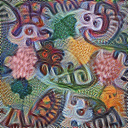

In [0]:
# 可视化一个神经元很简单！

_ = render.render_vis(model, "mixed4a_pre_relu:476")

## Getting a bit deeper更深入一点

Lucid splits visualizations into a few components which you can fiddle with completely indpendently:
Lucid将可视化分成一些组件，你也可以完全独立地摆弄这些组件：

* **objectives** -- What do you want the model to visualize?
* **parameterization** -- How do you describe the image?
* **transforms** -- What transformations do you want your visualization to be robust to?
* **objectives(目标)** -- 想要模型可视化什么？
* **parameterization(参数化)** -- 如何描述该图像？
* **transforms(变换)** -- 怎么样的变换是你的可视化想要增强的？

In this section, we'll experiment with each one.
在本节中，我们会逐一实验。

**Experimenting with objectives**
**使用objectives(目标)进行实验**

512 1583.1243



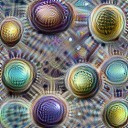

In [0]:
# Let's visualize another neuron using a more explicit objective: 让我们使用更显式的目标来可视化另一个神经元：

obj = objectives.channel("mixed4a_pre_relu", 465)
_ = render.render_vis(model, obj)

512 2312.0425



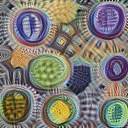

In [0]:
# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)

channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

**Transformation Robustness**

Recomended reading: The Feature Visualization article's section titled [The Enemy of Feature Visualization](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis) discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

512 2420.1245



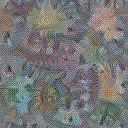

In [0]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1853.4551



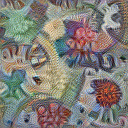

In [0]:
# Jitter 2

transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1195.9929



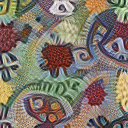

In [0]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

**Experimenting with parameterization**

Recomended reading: The Feature Visualization article's section on [Preconditioning and Parameterization](https://distill.pub/2017/feature-visualization/#preconditioning)

512 808.84076



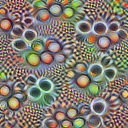

In [0]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

512 1191.0022



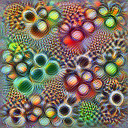

In [0]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)